In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    'code1':['10','11','12','13','10','11','12','13','10','11','12','13','10','11','12','13'],
    'code2':['14','15','16','17','14','15','16','17','14','15','16','17','16','17','14','15'],
    'is_success':['1','0','0','1','1','0','0','1','0','0','1','1','1','1','0','0']
})

df.head()

,code1,code2,is_success
0,10,14,1
1,11,15,0
2,12,16,0
3,13,17,1
4,10,14,1


In [3]:
# aggfunc='sum'を使うために型変換を行う
df['is_success'] = df['is_success'].astype(int)

In [4]:
'''合計/カウント数の割合を出すための準備'''
# 合計用のカラムとカウント用のカラムを新規作成
# 要素は['is_success']カラムと全く同じでそれを合計するか、カウントするかの違い
df['is_success_cnt'] = df['is_success']
df['is_success_sum'] = df['is_success']
df.head()

,code1,code2,is_success,is_success_cnt,is_success_sum
0,10,14,1,1,1
1,11,15,0,0,0
2,12,16,0,0,0
3,13,17,1,1,1
4,10,14,1,1,1


In [5]:
# [is_success_cnt]カラム：カウント
# [is_success_sum]カラム：合計
# を算出
group_df = df.groupby(['code1', 'code2']).agg({'is_success_cnt':'count', 'is_success_sum':'sum'})
group_df

is_success_cnt  is_success_sum
code1 code2                                
10    14                  3               2
      16                  1               1
11    15                  3               0
      17                  1               1
12    14                  1               0
      16                  3               1
13    15                  1               0
      17                  3               3

In [6]:
'''合計/カウント数の割合を要素とする新規カラムを作成'''
group_df['is_success_ratio'] = group_df['is_success_sum'] / group_df['is_success_cnt']
group_df

is_success_cnt  is_success_sum  is_success_ratio
code1 code2                                                  
10    14                  3               2          0.666667
      16                  1               1          1.000000
11    15                  3               0          0.000000
      17                  1               1          1.000000
12    14                  1               0          0.000000
      16                  3               1          0.333333
13    15                  1               0          0.000000
      17                  3               3          1.000000

### ピボットテーブル(平均)を作成する関数の定義

In [7]:
def create_mean_pivot_table(df, index, columns, values):
    pivot_df = pd.pivot_table(
    df,
    index=index,
    columns=columns,
    values=values,
    aggfunc='mean',
    fill_value=0
    )
    return pivot_df.head()

## 合計/カウント数の割合を要素としたピボットテーブルを作成

In [8]:
group_df = group_df.reset_index()# [code1]、[code2]カラムを列側に移動
pivot_group_df = create_mean_pivot_table(group_df, 'code1', 'code2', 'is_success_ratio')
pivot_group_df

code2,14,15,16,17
code1,,,,
10,0.666667,0,1.000000,0
11,0.000000,0,0.000000,1
12,0.000000,0,0.333333,0
13,0.000000,0,0.000000,1


### (おまけ) 合計/カウント数の割合をヒートマップに描画

In [9]:
def set_seaborn():
        graph_params = {
        'axes.labelsize':15,
        'axes.titlesize':15,
        'xtick.labelsize':15,
        'figure.figsize' : [16, 8],
        'ytick.labelsize' : 15,
        'legend.fontsize' : 15,
        'font.family' : 'IPAexGothic'}

        plt.rcParams.update(**graph_params)

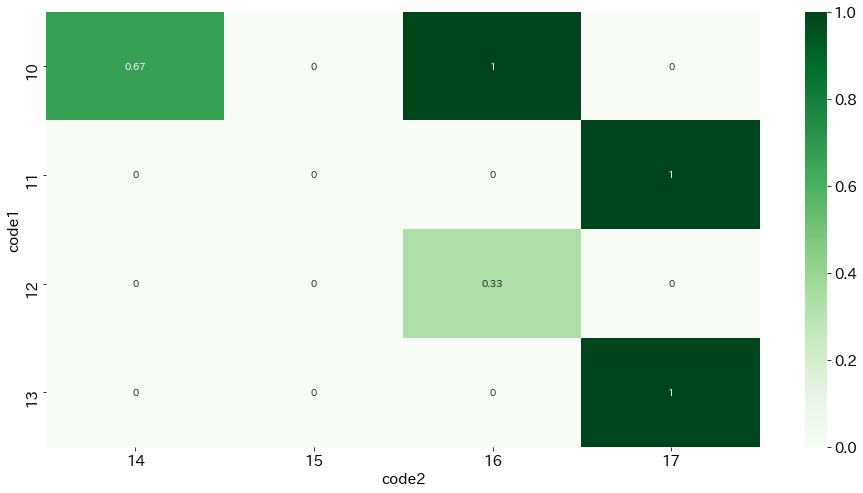

In [10]:
# cmap参考URL：https://matplotlib.org/examples/color/colormaps_reference.html
set_seaborn()
sns.heatmap(pivot_group_df, annot=True, cmap = 'Greens')